<a href="https://colab.research.google.com/github/costpetrides/Air-pollution-COVID-19-impact/blob/main/MachineLearning/AGPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
from sklearn.svm import  SVR                      # SVR
from sklearn.model_selection import GridSearchCV

In [4]:
# Import the data!

df=pd.read_csv('AGPATEST19.csv')
cols = df.columns.tolist()
df.head()

,NO,NO2,PM25,O3
0,1.500000,11.458333,4.714286,81.791667
1,1.083333,11.125000,4.083333,72.000000
2,1.083333,7.208333,7.230769,73.500000
3,1.041667,8.541667,8.708333,74.166667
4,1.041667,9.958333,9.166667,72.166667


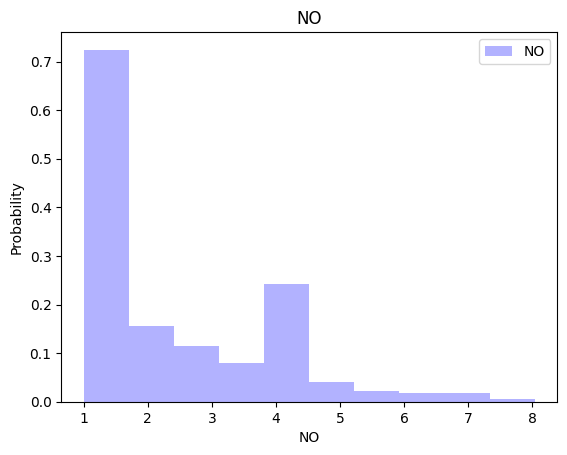

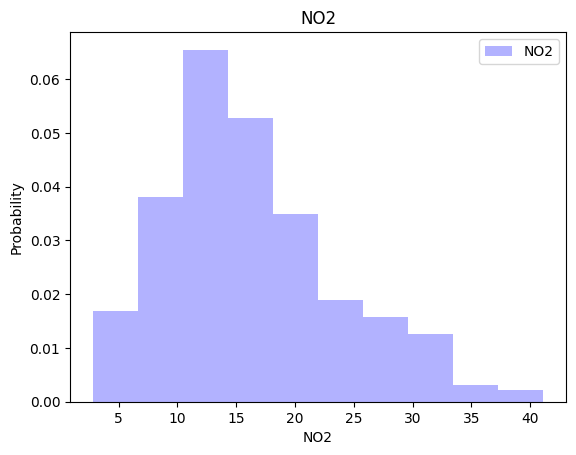

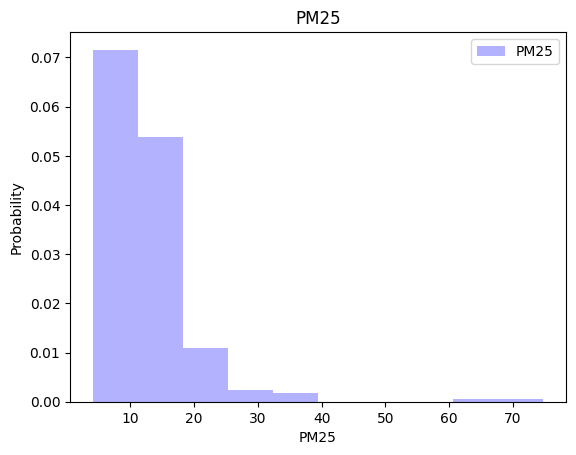

In [5]:
cols = df.columns.tolist()    # Here we make a list with all labels names

# Data visualization
for label in cols[:-1]:
  plt.hist(df[label], color='blue', label=label, alpha=0.3, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [6]:
# First, shuffle the DataFrame
df = df.sample(frac=1).reset_index(drop=True)

In [17]:
# We split the data into training (60%), validation (20%), and test (20%) sets

train_end = int(0.9 * len(df))

train = df[:train_end]
test = df[train_end:]

train = df[:train_end]
test = df[train_end:]

In [26]:
# Scaling :)

def preprocess_data(dataframe):
    # Separate features and target variable
    x = dataframe.iloc[:, :-1].values
    y = dataframe.iloc[:, -1].values

    return x, y


# Apply preprocessing to your datasets
train_x, train_y = preprocess_data(train)
test_x, test_y = preprocess_data(test)

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, reciprocal

# Define the parameter distributions
param_dist = {'C': reciprocal(1, 100), 'gamma': uniform(0.01, 1), 'epsilon': uniform(0.01, 1)}

# Create SVR model
svr = SVR(kernel='linear')

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(svr, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error')
random_search.fit(train_x, train_y)

# Get the best hyperparameters
best_params = random_search.best_params_
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'C': 1.9723726932120107, 'epsilon': 0.4759742130285296, 'gamma': 0.6635842407031352}


In [28]:
# Train the final model with the best alpha

svr_model = SVR(kernel='rbf', **best_params)
svr_model.fit(train_x, train_y)

SVR(C=1.9723726932120107, epsilon=0.4759742130285296, gamma=0.6635842407031352)

In [29]:
pred_y = svr_model.predict(test_x)

# Evaluate the model
mse = mean_squared_error(test_y, pred_y)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 233.09


In [30]:
# Assuming Knn_model is your trained KNN regressor
pred_y = svr_model.predict(test_x)

# Evaluate the model
mae = mean_absolute_error(test_y, pred_y)
mse = mean_squared_error(test_y, pred_y)
r2 = r2_score(test_y, pred_y)

# Display the custom regression report
print("Custom Regression Report:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Custom Regression Report:
Mean Absolute Error: 12.68
Mean Squared Error: 233.09
R-squared (R2): -0.09


# Random Forest Regression

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [34]:
# Import the data!

df=pd.read_csv('AGPATEST19.csv')
cols = df.columns.tolist()
df.head()

,NO,NO2,PM25,O3
0,1.500000,11.458333,4.714286,81.791667
1,1.083333,11.125000,4.083333,72.000000
2,1.083333,7.208333,7.230769,73.500000
3,1.041667,8.541667,8.708333,74.166667
4,1.041667,9.958333,9.166667,72.166667


In [35]:
cols = df.columns.tolist()    # Here we make a list with all labels names

In [41]:
# First, shuffle the DataFrame
df = df.sample(frac=1).reset_index(drop=True)

In [42]:
# We split the data into training (60%), validation (20%), and test (20%) sets

train_end = int(0.9 * len(df))

train = df[:train_end]
test = df[train_end:]

train = df[:train_end]
test = df[train_end:]

In [43]:
# Scaling :)

def preprocess_data(dataframe):
    # Separate features and target variable
    x = dataframe.iloc[:, :-1].values
    y = dataframe.iloc[:, -1].values

    return x, y


# Apply preprocessing to your datasets
train_x, train_y = preprocess_data(train)
test_x, test_y = preprocess_data(test)

In [44]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(train_x, train_y)

RandomForestRegressor(random_state=42)

In [45]:
pred_y = rf_model.predict(test_x)

# Evaluate the model
mse = mean_squared_error(test_y, pred_y)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 224.43


In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming Knn_model is your trained KNN regressor
pred_y = rf_model.predict(test_x)

# Evaluate the model
mae = mean_absolute_error(test_y, pred_y)
mse = mean_squared_error(test_y, pred_y)
r2 = r2_score(test_y, pred_y)

# Display the custom regression report
print("Custom Regression Report:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Custom Regression Report:
Mean Absolute Error: 13.26
Mean Squared Error: 224.43
R-squared (R2): -0.09


# XGBoost - Regression

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


import xgboost as xgb # XGBoost library :)

In [49]:
pip install xgboost optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.9 MB/s eta 0:00:00


In [70]:
import optuna


def objective(trial):
    params = {
        'objective': 'reg:squaredlogerror',
        'eval_metric': 'rmse',
        'booster': 'gbtree',
        'verbosity': 0,
        'n_jobs': -1,
        'random_state': 42,
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 10, 100),  # Lowering the range
        'max_depth': trial.suggest_int('max_depth', 2, 8),  # Lowering the range
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),  # Lowering the range
        'subsample': trial.suggest_uniform('subsample', 0.5, 1),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1),
        'alpha': trial.suggest_loguniform('alpha', 1e-8, 1),
    }


    model = xgb.XGBRegressor(**params)

    # Train the model
    model.fit(train_x, train_y)

    # Make predictions on the test set
    pred_y = model.predict(test_x)

    # Evaluate the model on the test set using mean squared error
    mse = mean_squared_error(test_y, pred_y)

    return mse  # Optimize to minimize mean squared error

# Perform hyperparameter optimization with Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params

# Use the best hyperparameters in your program
best_model = xgb.XGBRegressor(**best_params)
best_model.fit(train_x, train_y)

# Now, you can use the best_model for predictions or any other tasks

[I 2023-10-13 14:17:53,647] A new study created in memory with name: no-name-5303249e-86d4-4987-9bc6-e698091a903b
<ipython-input-70-2b47c562b049>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-70-2b47c562b049>:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1),
<ipython-input-70-2b47c562b049>:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5

XGBRegressor(alpha=0.0022493374300990637, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7814740254733961, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.10710194034977717,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.29691903892275356,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=17, n_jobs=None,
             num_parallel_tree=None, ...)

In [71]:
pred_y = best_model.predict(test_x)

# Evaluate the model
mse = mean_squared_error(test_y, pred_y)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 268.53


In [72]:
pred_y = best_model.predict(test_x)

# Evaluate the model
mae = mean_absolute_error(test_y, pred_y)
mse = mean_squared_error(test_y, pred_y)
r2 = r2_score(test_y, pred_y)

# Display the custom regression report
print("Custom Regression Report:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Custom Regression Report:
Mean Absolute Error: 14.59
Mean Squared Error: 268.53
R-squared (R2): -0.30


# K-Nearest Neighbors (KNN)

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsRegressor

In [96]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from joblib import Parallel, delayed

# Function to train and evaluate a KNN model for a specific number of neighbors
def train_and_evaluate(n_neighbors, train_x, train_y, valid_x, valid_y):
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    valid_pred_y = model.fit(train_x, train_y).predict(valid_x)
    mse = mean_squared_error(valid_y, valid_pred_y)
    return n_neighbors, mse

# Define the range of neighbors
neighbors_range = range(1, 21)

# Use joblib to parallelize the computations
results = Parallel(n_jobs=-1)(
    delayed(train_and_evaluate)(n_neighbors, train_x, train_y, valid_x, valid_y)
    for n_neighbors in neighbors_range
)

# Find the best hyperparameters based on MSE
best_n_neighbors, best_mse = min(results, key=lambda x: x[1])

# Print the best hyperparameters found
print("Best n_neighbors:", best_n_neighbors)
print("Best Validation Mean Squared Error:", best_mse)

Best n_neighbors: 1
Best Validation Mean Squared Error: 28.561189090685932


In [97]:
# Train our model with k-Nearest Neighbors (k-NN) algorithm

Knn_model = KNeighborsRegressor(n_neighbors=3)
Knn_model.fit(train_x, train_y)

KNeighborsRegressor(n_neighbors=3)

In [99]:
# Assuming Knn_model is your trained KNN regressor
pred_y = Knn_model.predict(test_x)

# Evaluate the model
mse = mean_squared_error(test_y, pred_y)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 236.83


In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming Knn_model is your trained KNN regressor
pred_y = Knn_model.predict(test_x)

# Evaluate the model
mae = mean_absolute_error(test_y, pred_y)
mse = mean_squared_error(test_y, pred_y)
r2 = r2_score(test_y, pred_y)

# Display the custom regression report
print("Custom Regression Report:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Custom Regression Report:
Mean Absolute Error: 12.98
Mean Squared Error: 236.83
R-squared (R2): -0.15
